# 实验一

张天乐 计96 2018011038

## 上机题1

### 实验内容

编程实现例 1.4 , 绘出图 1-2 , 体会两种误差对结果的不同影响


### 实验过程

步长为 $h$ ，截断误差限为 $\frac{Mh}{2}$ ，其中的 $M$ 是 $|f''(\varepsilon)|$ 的上界。舍入误差限为 $\frac{2\varepsilon}{h}$ 。总误差限为 $\varepsilon_{tot} = \frac{Mh}{2} + \frac{2\varepsilon}{h}$ 

用上述方法计算函数 $f(x)=\sin(x)$，在 $x=1$ 点的导数值，绘制总的计算误差与步长 $h$ 的依赖关系。取 $M=1$ ， $\varepsilon \approx 10^{-16}$，绘制图 1-2 。

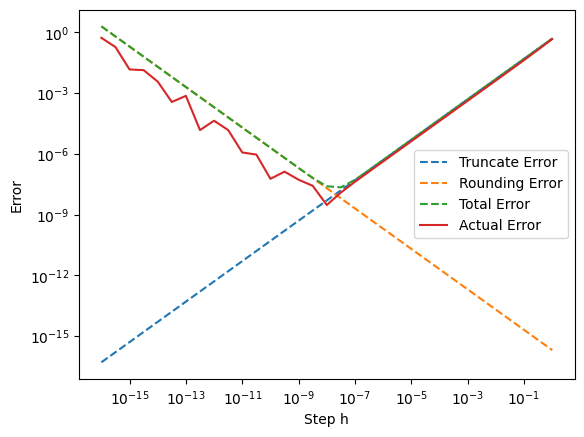

In [48]:
import numpy as np
import matplotlib.pyplot as plt

M = 1
e = 1e-16

h = np.array([10 ** (i * 0.5) for i in range(-32, 1)], dtype=np.float64)

truncate_error = M * h / 2
rounding_error = 2 * e / h
total_error = truncate_error + rounding_error
actual_error = np.abs((np.sin(1 + h) - np.sin(1)) / h - np.cos(1))

ax = plt.subplot()
ax.set_xscale("log")
ax.set_xlabel('Step h')
ax.set_yscale("log")
ax.set_ylabel('Error')
plt.plot(h, truncate_error, '--', label='Truncate Error')
plt.plot(h, rounding_error, '--', label='Rounding Error')
plt.plot(h, total_error, '--', label='Total Error')
plt.plot(h, actual_error, '-', label='Actual Error')
plt.legend()
plt.show()

### 实验结论

截断误差随 $h$ 的增加而增加，舍入误差随 $h$ 的增加而减少。选择合适的步长可以使计算误差最小。从图中可以看出总误差在 $h \approx 10^{-8}$ 处取最小值。

## 上机题3

### 实验内容

编程观察无穷级数

$$
\sum_{n=1}^{\infty}\frac{1}{n}
$$

的求和计算

### 实验内容

#### (1) 采用 IEEE 单精度浮点数, 观察当 n 为何值时, 求和结果不再变化, 将它与理论分析的结论进行比较

In [49]:
n = 1
sum = np.float32(0)

while True:
    new_sum = sum + np.float32(1 / n)
    if new_sum == sum:
        break
    sum = new_sum
    n += 1
    
print('n = {}, 求和不再变化, sum = {}'.format(n, sum))

n = 2097152, 求和不再变化, sum = 15.403682708740234


根据定理 1.6 ，若 $|\frac{x_2}{x_1}| \le \frac{1}{2} \varepsilon_{\text{mach}}$ ，则 $x_2$ 的值对浮点运算 $x_1 + x_2$ 的结果毫无影响。


实验中，$x_2 = 1 / n = 1 / 2097152$ ，$x_1 + x_2 = sum = 15.403682708740234$，$\varepsilon_{\text{mach}} = 2^{-24} = 5.960 \times 10^{-8}$

此时， $\frac{1}{2} \varepsilon_{\text{mach}} \times sum = 4.5906551804364426\times 10^{-07}$ ，$1/n = 4.76837158203125\times 10^{-07}$

$|\frac{x_2}{x_1}| = 3.095604839131738\times 10^{-8}$

可以看到理论值和计算值接近但有一定误差，这是由于定理 1.6 是一定会“大数吃小数”的情况，实验的情况$\frac{1}{2} \varepsilon_{\text{mach}} < |\frac{x_2}{x_1}| < \varepsilon_{\text{mach}}$，是介于“一定吃”和“一定不吃”之间。但在具体实验中还是发生了“大数吃小数”。

#### (2) 用 IEEE 双精度浮点数再次计算 (1) 中得到的前 n 项, 评估 IEEE 单精度浮点数计算结果的误差

In [50]:
n = 1
sum_32 = np.float32(0)
sum_64 = np.float64(0)

while n <= 2097152:
    sum_64 = sum_64 + np.float32(1 / n)
    sum_32 = sum_32 + np.float32(1 / n)
    n += 1

print('sum = {}'.format(sum_64))

dif_abs = np.abs(sum_64 - sum_32)
dif_rel = dif_abs / sum_64

print('绝对误差 = {}, 相对误差 = {:%}'.format(dif_abs, dif_rel))

sum = 15.133306760671019
绝对误差 = 0.2703759480692156, 相对误差 = 1.786628%


#### (3) 采用 IEEE 双精度浮点数, 请估计当 n 为何值时上述无穷级数求和结果不再变化, 这在当前做实验的计算机上大概需要多长的计算时间？

有近似公式 $\sum_{k=1}^{n}{1/k} \approx \ln(1+n)$

采用 IEEE 双精度浮点数，当级数求和结果不再变化时，$\frac{1/n}{sum} \le \frac{1}{2} \varepsilon_{\text{mach}} = \frac{1}{2} \times 2^{-53}$

即 $n \times \ln(n+1)\ge 2^{54}$ ，解得$n\ge 5.3\times 10^{14}$。

测试计算到 $n = 10^7$ 的运行时间是 4.364445686340332s 。估计在当前电脑上计算时间为 $2.277 \times 10^8s$

In [51]:
import time

time_start = time.time()
n = 1
sum = np.float64(0)

while n <= 1e7:
    new_sum = sum + np.float64(1 / n)
    if new_sum == sum:
        break
    sum = new_sum
    n += 1

time_end = time.time()
print('测试时间  = {}s'.format(time_end - time_start))
print('预计总时间 = {}s'.format(5.3e7 * (time_end - time_start)))

测试时间  = 4.40114688873291s
预计总时间 = 233260785.10284424s
